# 第一周内容

数据处理目标：
1. 清洗数据，将不合理异常值和空缺值剔除
2. 按商店分组，找到销售量最好的店面（分析商店选址是否合适）
3. 按商店分组，找到客流量最大的店面
4. 按商品分组，绘制销量图，找到各个店销售额贡献最大的商品（没有所有商品在原价时的销售额，无法分析无促销是的销售额）

## 导入必要的图形处理包

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 导入数据和数据预处理（Basket-2018-06-01-2018-07-05.csv）

In [53]:
import pandas as pd
data1 = pd.read_csv('E:\\非功能性文件\\study\\postgraduate\\研二上\\python\\作业\\20201006作业\\数据集\\Basket-2018-06-01-2018-07-05.csv')
data1 = data1.iloc[:,:]
data1.head(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [54]:
data1.isnull().any()#查看是否有缺失值

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [55]:
data1=data1[data1['BASK_SPEND']>0]  #剔除data1数据集中bask_spend列小于0的行
data1.head(5)

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


## 导入数据和数据预处理（item-2018-06-01-2018-07-05.csv）

In [56]:
import pandas as pd
data2 = pd.read_csv('E:\\非功能性文件\\study\\postgraduate\\研二上\\python\\作业\\20201006作业\\数据集\\item-2018-06-01-2018-07-05.csv')
data2 = data2.iloc[:,:]
data2.head(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [57]:
data2.isnull().any()#查看是否有缺失值

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [58]:
data2=data2[data2['ITEM_SPEND']>0]  #剔除data2数据集中ITEM_SPEND列小于0的行
data2=data2[data2['ITEM_QUANTITY']>0]  #剔除data2数据集中ITEM_QUANTITY列小于0的行
data2=data2[data2['NORMAL_PRICE']>0]  #剔除data2数据集中NORMAL_PRICE列小于0的行
data2.head(5)

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 根据表（Basket-2018-06-01-2018-07-05.csv）找到商店的销售额排序

In [59]:
SalesRanking = data1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
SalesRanking

,STORE_CODE,BASK_SPEND
0,A001,3.478348e+06
15,D002,3.177385e+06
20,D007,1.382203e+06
4,A008,1.324641e+06
8,A013,1.126551e+06
2,A006,9.439233e+05
7,A012,8.546610e+05
17,D004,8.153388e+05
19,D006,8.144365e+05
5,A009,8.052129e+05


从上述排序中可以得到每家商店的销售额不同，存在差异较大，可收集更多信息进一步分析销售额不同的原因，根据分析结果适当改换商店选址策略。
为了更加直观看出商店之间的销售额不同，绘制柱形图展现各商店的销售额情况。

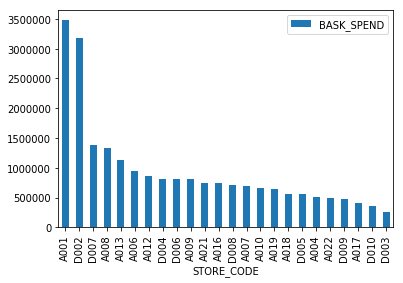

In [61]:
SalesRanking.set_index('STORE_CODE',inplace=True)
SalesRanking.plot(kind='bar')

## 分析商店的客流量

In [63]:
CustomerFlow = data1.loc[:,'STORE_CODE'].value_counts()
CustomerFlow

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

从上述排序中可以看出基本和销售额排序相同，说明客流量是影响销售额的一个重要原因。

## 分析商品销量（没有所有商品在原价时的销售额，无法分析无促销是的销售额） 

In [65]:
ProdRanking = data2.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False)
ProdRanking

,PROD_CODE,ITEM_QUANTITY
7956,149413,30741.000
15641,220834,20119.000
1435,7133,15184.000
3713,61623,14651.000
5055,86772,14135.000
11049,194690,13930.196
9362,178462,13320.000
6711,124556,13320.000
294,1152,12346.000
2531,19211,11727.000
